# Paired programming - Rich & Zomi

# Data Exploration/ Analysis 

In [1]:
# Libraries import
import datetime
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import pearsonr
import sqlite3 #import sqlite 3 module
import os
import ast
import warnings
warnings.filterwarnings("ignore")
import seaborn as sb
from scipy.stats import chi2_contingency 
import numpy as np
import scipy.stats as stats

# Data Cleansing/Exploratory

## All data file will be querried from a database_ im_combined.db

In [3]:
# Query data into a pandas dataframe (df)
conn = sqlite3.connect('../../Data/im_combined.db')

SQLQuery_2 = """
Select
a.*
,(Select b.genres from IMDB_movie_basics b where b.primary_title = a.title) as Genres
,(Select c1.average_rating from IMDB_movie_basics b1, IMDB_movie_ratings c1 where c1.movie_id = b1.movie_id and b1.primary_title = a.title) as AverageRating

from VIEW_movie_budgets a


;"""

df = pd.read_sql(SQLQuery_2,conn)
df.head()  # First 5 rows to give a sense of what the data is like



,Title,studio,TNWorlwideGross,TNDomesticGross,ComputedForeignGross,TNBudget/Cost,Computed_Profit_Loss,year,release_date,Genres,AverageRating
0,10 Cloverfield Lane,Par.,108286422,72082999,36203423,5000000,103286422,2016,3/11/2016,"Drama,Horror,Mystery",7.2
1,12 Strong,WB,71118378,45819713,25298665,35000000,36118378,2018,1/19/2018,"Action,Drama,History",6.6
2,12 Years a Slave,FoxS,181025343,56671993,124353350,20000000,161025343,2013,10/18/2013,"Biography,Drama,History",8.1
3,127 Hours,FoxS,60217171,18335230,41881941,18000000,42217171,2010,11/5/2010,"Adventure,Biography,Drama",7.6
4,13 Hours: The Secret Soldiers of Benghazi,Par.,69411370,52853219,16558151,50000000,19411370,2016,1/15/2016,None,NaN


In [4]:
print(df.shape) # sample size is 1255 with 11 columns
print(df.duplicated().sum()) # check for duplicated rows- we dont expect to have this issue. there are no duplicates- good


(1255, 11)
0


In [5]:
# rename the columns to make it easier to understand
df = df.rename(columns={"Computed_Profit_Loss": "Profit", "TNBudget/Cost": "Costs", "year": "Release Year", 
                        "AverageRating": "Average Ratings","studio" : 'Studio', "Title" : "Movie", 
                        "TNWorlwideGross":"Total Gross Revenue", "TNDomesticGross":"Domestic Gross Revenue", 
                        "ComputedForeignGross":"Foreign Gross Revenue","release_date":"Release Date"})

In [6]:
df.describe() # This is very difficult to make meaning into, eg, year should not be here and the numbers are not easy to read

,Total Gross Revenue,Domestic Gross Revenue,Foreign Gross Revenue,Costs,Profit,Release Year,Average Ratings
count,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03,1255.000000,1160.000000
mean,1.539185e+08,6.142703e+07,9.249151e+07,4.759606e+07,1.063225e+08,2013.572112,6.445517
std,2.354813e+08,8.492840e+07,1.584311e+08,5.611265e+07,1.947030e+08,2.544849,0.962443
min,1.242000e+03,0.000000e+00,0.000000e+00,5.000000e+04,-1.104502e+08,2010.000000,1.600000
25%,1.932979e+07,8.144488e+06,6.310566e+06,1.000000e+07,2.684770e+06,2011.000000,5.900000
50%,6.596775e+07,3.368099e+07,2.827263e+07,2.750000e+07,3.373596e+07,2013.000000,6.500000
75%,1.732233e+08,7.561850e+07,9.999483e+07,6.000000e+07,1.198253e+08,2016.000000,7.100000
max,2.048134e+09,7.000596e+08,1.369319e+09,4.106000e+08,1.748134e+09,2018.000000,9.200000


In [12]:
# Convert all the float that are important to us to integers
df['Total Gross Revenue']= df['Total Gross Revenue'].astype(int)
df['Costs']= df['Costs'].astype(int)
df['Profit']= df['Profit'].astype(int)

In [13]:
df['Costs'].dtype

dtype('int32')

In [14]:
# Lets make the numbers esy to read by dividing by a million
df['Total Gross Revenue'] = df['Total Gross Revenue']/1000000
df['Domestic Gross Revenue'] = df['Domestic Gross Revenue']/1000000
df['Foreign Gross Revenue'] = df['Foreign Gross Revenue']/1000000
df['Costs'] = df['Costs']/1000000
df['Profit'] = df['Profit']/1000000

In [21]:
# Convert all the float that are important to us to integers
df['Total Gross Revenue']= df['Total Gross Revenue'].astype(int)
df['Costs']= df['Costs'].astype(int)
df['Profit']= df['Profit'].astype(int)

In [23]:
# numbers look easy to read now 
df.describe()

,Total Gross Revenue,Domestic Gross Revenue,Foreign Gross Revenue,Costs,Profit,Release Year,Average Ratings
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1160.000000
mean,153.420717,61.427029,92.491506,47.533865,106.023904,2013.572112,6.445517
std,235.475195,84.928398,158.431136,56.144737,194.579876,2.544849,0.962443
min,0.000000,0.000000,0.000000,0.000000,-110.000000,2010.000000,1.600000
25%,19.000000,8.144488,6.310566,10.000000,2.000000,2011.000000,5.900000
50%,65.000000,33.680992,28.272632,27.000000,33.000000,2013.000000,6.500000
75%,172.500000,75.618505,99.994832,60.000000,119.500000,2016.000000,7.100000
max,2048.000000,700.059566,1369.318718,410.000000,1748.000000,2018.000000,9.200000


In [24]:
# check to see the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Movie                   1255 non-null   object 
 1   Studio                  1254 non-null   object 
 2   Total Gross Revenue     1255 non-null   int32  
 3   Domestic Gross Revenue  1255 non-null   float64
 4   Foreign Gross Revenue   1255 non-null   float64
 5   Costs                   1255 non-null   int32  
 6   Profit                  1255 non-null   int32  
 7   Release Year            1255 non-null   int64  
 8   Release Date            1255 non-null   object 
 9   Genres                  1156 non-null   object 
 10  Average Ratings         1160 non-null   float64
dtypes: float64(3), int32(3), int64(1), object(4)
memory usage: 93.3+ KB


<Figure size 720x432 with 0 Axes>

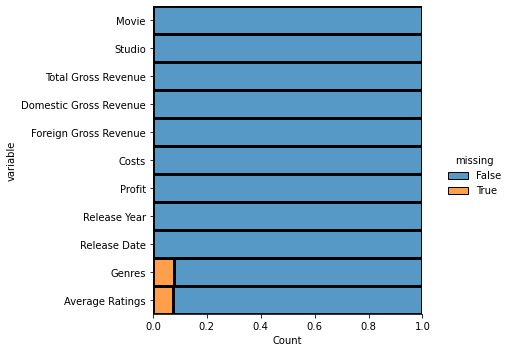

In [25]:
# Visualizing data for missing value
# As you can see, there are  missing values in 2 of the columns: genres, average ratings
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

array([[<AxesSubplot:title={'center':'Total Gross Revenue'}>,
        <AxesSubplot:title={'center':'Domestic Gross Revenue'}>,
        <AxesSubplot:title={'center':'Foreign Gross Revenue'}>],
       [<AxesSubplot:title={'center':'Costs'}>,
        <AxesSubplot:title={'center':'Profit'}>,
        <AxesSubplot:title={'center':'Release Year'}>],
       [<AxesSubplot:title={'center':'Average Ratings'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

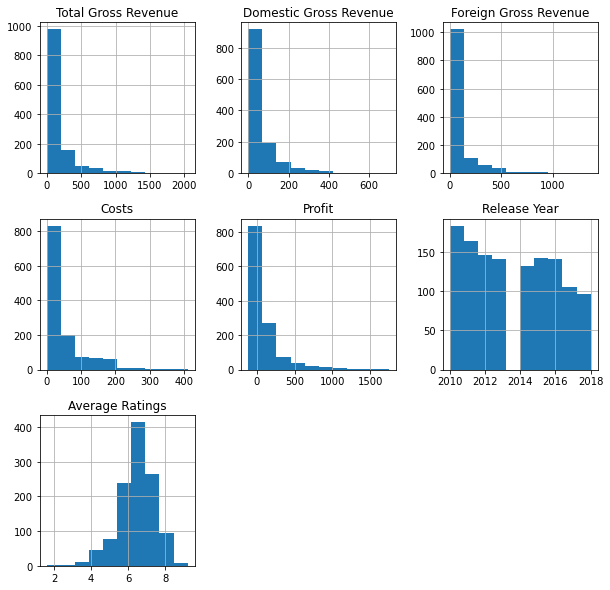

In [26]:
df.hist(figsize=(10,10)) # histogram to visualize the distribution of the data

In [27]:
df['Profit Margin'] = df['Profit'] / df['Total Gross Revenue'] # calculate profit margins
df

,Movie,Studio,Total Gross Revenue,Domestic Gross Revenue,Foreign Gross Revenue,Costs,Profit,Release Year,Release Date,Genres,Average Ratings,Profit Margin
0,10 Cloverfield Lane,Par.,108,72.082999,36.203423,5,103,2016,3/11/2016,"Drama,Horror,Mystery",7.2,0.953704
1,12 Strong,WB,71,45.819713,25.298665,35,36,2018,1/19/2018,"Action,Drama,History",6.6,0.507042
2,12 Years a Slave,FoxS,181,56.671993,124.353350,20,161,2013,10/18/2013,"Biography,Drama,History",8.1,0.889503
3,127 Hours,FoxS,60,18.335230,41.881941,18,42,2010,11/5/2010,"Adventure,Biography,Drama",7.6,0.700000
4,13 Hours: The Secret Soldiers of Benghazi,Par.,69,52.853219,16.558151,50,19,2016,1/15/2016,None,NaN,0.275362
...,...,...,...,...,...,...,...,...,...,...,...,...
1250,Zookeeper,Sony,170,80.360866,90.444659,80,90,2011,7/8/2011,"Comedy,Family,Romance",5.2,0.529412
1251,Zoolander 2,Par.,55,28.848693,26.500000,50,5,2016,2/12/2016,Comedy,4.7,0.090909
1252,Zootopia,BV,1019,341.268248,678.161368,150,869,2016,3/4/2016,"Adventure,Animation,Comedy",8.0,0.852797
1253,[Rec] 2,Magn.,18,0.027766,18.500000,5,12,2010,7/9/2010,None,NaN,0.666667


In [28]:
#Convert the Release Date field to type datetime.
df['Release Date'] = pd.to_datetime(df['Release Date'])

#Add a  month col from the release date, 
df['Month'] =  [x.strftime('%B') for x in df['Release Date']]

df.head(2)

,Movie,Studio,Total Gross Revenue,Domestic Gross Revenue,Foreign Gross Revenue,Costs,Profit,Release Year,Release Date,Genres,Average Ratings,Profit Margin,Month
0,10 Cloverfield Lane,Par.,108,72.082999,36.203423,5,103,2016,2016-03-11,"Drama,Horror,Mystery",7.2,0.953704,March
1,12 Strong,WB,71,45.819713,25.298665,35,36,2018,2018-01-19,"Action,Drama,History",6.6,0.507042,January


In [29]:
# Converting to Seasons and adding a col called seasons

mapping = {'January':'Winter','February':'Winter','March':'Spring', 'April':'Spring','May':'Spring', 'June':'Summer',
                'July':'Summer','August':'Summer','September':'Fall','October':'Fall','November':'Fall','December':'Winter'}
df['Seasons'] = df['Month'].map(mapping)
df.head(2)

,Movie,Studio,Total Gross Revenue,Domestic Gross Revenue,Foreign Gross Revenue,Costs,Profit,Release Year,Release Date,Genres,Average Ratings,Profit Margin,Month,Seasons
0,10 Cloverfield Lane,Par.,108,72.082999,36.203423,5,103,2016,2016-03-11,"Drama,Horror,Mystery",7.2,0.953704,March,Spring
1,12 Strong,WB,71,45.819713,25.298665,35,36,2018,2018-01-19,"Action,Drama,History",6.6,0.507042,January,Winter


In [30]:
# drop the missing data in genres and average ratings
df.dropna(axis = 0, inplace= True, subset=['Genres', 'Average Ratings'])

In [31]:
# there are no missing
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1252
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Movie                   1155 non-null   object        
 1   Studio                  1155 non-null   object        
 2   Total Gross Revenue     1155 non-null   int32         
 3   Domestic Gross Revenue  1155 non-null   float64       
 4   Foreign Gross Revenue   1155 non-null   float64       
 5   Costs                   1155 non-null   int32         
 6   Profit                  1155 non-null   int32         
 7   Release Year            1155 non-null   int64         
 8   Release Date            1155 non-null   datetime64[ns]
 9   Genres                  1155 non-null   object        
 10  Average Ratings         1155 non-null   float64       
 11  Profit Margin           1142 non-null   float64       
 12  Month                   1155 non-null   object  

<Figure size 720x432 with 0 Axes>

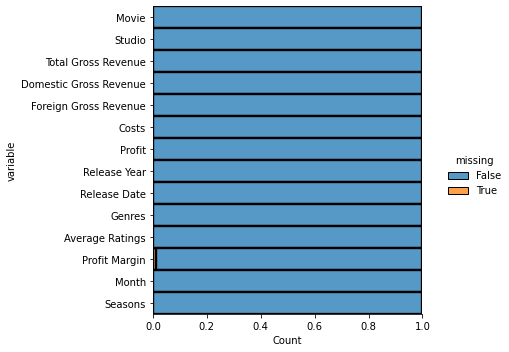

In [32]:
# confirm with visual for missing values
# Visualizing data for missing value
# As you can see, there are  missing values in 2 of the columns: genres, average ratings
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("missing_value_df.png", dpi=100)


In [33]:
# splitt the genres column and will just focus on one part of it
df[['Genres','other 1 Genres', 'Other 2 Genres']] = df['Genres'].str.split(',',expand=True)
#df['Genres'].str.split(',',expand=True)
df

,Movie,Studio,Total Gross Revenue,Domestic Gross Revenue,Foreign Gross Revenue,Costs,Profit,Release Year,Release Date,Genres,Average Ratings,Profit Margin,Month,Seasons,other 1 Genres,Other 2 Genres
0,10 Cloverfield Lane,Par.,108,72.082999,36.203423,5,103,2016,2016-03-11,Drama,7.2,0.953704,March,Spring,Horror,Mystery
1,12 Strong,WB,71,45.819713,25.298665,35,36,2018,2018-01-19,Action,6.6,0.507042,January,Winter,Drama,History
2,12 Years a Slave,FoxS,181,56.671993,124.353350,20,161,2013,2013-10-18,Biography,8.1,0.889503,October,Fall,Drama,History
3,127 Hours,FoxS,60,18.335230,41.881941,18,42,2010,2010-11-05,Adventure,7.6,0.700000,November,Fall,Biography,Drama
5,13 Sins,RTWC,0,0.009134,0.038418,4,-3,2014,2014-04-18,Horror,6.3,-inf,April,Spring,Thriller,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,Youth,FoxS,24,2.703296,21.298277,13,11,2015,2015-12-04,Drama,6.6,0.458333,December,Winter,Family,None
1249,Zero Dark Thirty,Sony,134,95.720716,38.891719,52,82,2012,2012-12-19,Drama,7.4,0.611940,December,Winter,Thriller,None
1250,Zookeeper,Sony,170,80.360866,90.444659,80,90,2011,2011-07-08,Comedy,5.2,0.529412,July,Summer,Family,Romance
1251,Zoolander 2,Par.,55,28.848693,26.500000,50,5,2016,2016-02-12,Comedy,4.7,0.090909,February,Winter,None,None


# Business Question 1


###  How much on average should Computing Vision invest into producing profitable movies?

In [34]:
df.head()

,Movie,Studio,Total Gross Revenue,Domestic Gross Revenue,Foreign Gross Revenue,Costs,Profit,Release Year,Release Date,Genres,Average Ratings,Profit Margin,Month,Seasons,other 1 Genres,Other 2 Genres
0,10 Cloverfield Lane,Par.,108,72.082999,36.203423,5,103,2016,2016-03-11,Drama,7.2,0.953704,March,Spring,Horror,Mystery
1,12 Strong,WB,71,45.819713,25.298665,35,36,2018,2018-01-19,Action,6.6,0.507042,January,Winter,Drama,History
2,12 Years a Slave,FoxS,181,56.671993,124.353350,20,161,2013,2013-10-18,Biography,8.1,0.889503,October,Fall,Drama,History
3,127 Hours,FoxS,60,18.335230,41.881941,18,42,2010,2010-11-05,Adventure,7.6,0.700000,November,Fall,Biography,Drama
5,13 Sins,RTWC,0,0.009134,0.038418,4,-3,2014,2014-04-18,Horror,6.3,-inf,April,Spring,Thriller,None


In [35]:
# With a focus on profits, create a new df for profit making movies, profit >0  and sort it

profitable_movies = df.loc[df['Profit'] > 0]
profitable_ranked = profitable_movies.sort_values(by=['Profit'], ascending=False)
profitable_ranked.reset_index(inplace=True)
profitable_ranked.head(2)

,index,Movie,Studio,Total Gross Revenue,Domestic Gross Revenue,Foreign Gross Revenue,Costs,Profit,Release Year,Release Date,Genres,Average Ratings,Profit Margin,Month,Seasons,other 1 Genres,Other 2 Genres
0,97,Avengers: Infinity War,BV,2048,678.815482,1369.318718,300,1748,2018,2018-04-27,Action,8.5,0.853516,April,Spring,Adventure,Sci-Fi
1,479,Jurassic World,Uni.,1648,652.270625,996.584239,215,1433,2015,2015-06-12,Action,7.0,0.869539,June,Summer,Adventure,Sci-Fi


In [36]:
# summary statistics on profitable movies df- NT, release year is an odd one that should be ignored and so is the index
profitable_ranked.describe()

,index,Total Gross Revenue,Domestic Gross Revenue,Foreign Gross Revenue,Costs,Profit,Release Year,Average Ratings,Profit Margin
count,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000
mean,636.868217,200.842746,79.767917,121.578729,55.331118,145.458472,2013.740864,6.504762,0.636944
std,359.913505,259.111328,92.551680,176.025792,60.715249,214.474266,2.507497,0.980661,0.224596
min,0.000000,2.000000,0.000000,0.009606,0.000000,1.000000,2010.000000,1.600000,0.006623
25%,330.500000,44.000000,23.819057,17.310968,13.000000,21.000000,2012.000000,6.000000,0.508434
50%,643.000000,99.000000,48.071303,51.043254,32.000000,61.000000,2014.000000,6.600000,0.677419
75%,949.500000,244.500000,100.508826,145.330421,75.000000,166.000000,2016.000000,7.200000,0.805502
max,1252.000000,2048.000000,700.059566,1369.318718,410.000000,1748.000000,2018.000000,9.200000,1.000000


# The focus will be on the top 10 companies as these companies are making more profit/revenue on average as shown below

In [37]:
print(' Profitable movies' " ", profitable_ranked['Profit'].median() )# why we chose all profit making movies
print(' top 10 profitable movies' " ", profitable_ranked.loc[0:9, 'Profit'].median() )# why we chose first 10
print(' top 15 profitable movies' " ", profitable_ranked.loc[0:14, 'Profit'].median() )# why we chose first 15
print(' top 20 profitable movies' " ", profitable_ranked.loc[0:19, 'Profit'].median() )# why we chose first 20

 Profitable movies  61.0
 top 10 profitable movies  1128.5
 top 15 profitable movies  1072.0
 top 20 profitable movies  1000.5


In [38]:
print(' Profitable movies' " ", profitable_ranked['Profit'].mean() )# why we chose all profit making movies
print(' top 10 profitable movies' " ", profitable_ranked.loc[0:9, 'Profit'].mean() )# why we chose first 10
print(' top 15 profitable movies' " ", profitable_ranked.loc[0:14, 'Profit'].mean() )# why we chose first 15
print(' top 20 profitable movies' " ", profitable_ranked.loc[0:19, 'Profit'].mean() )# why we chose first 20

 Profitable movies  145.45847176079735
 top 10 profitable movies  1212.9
 top 15 profitable movies  1126.4
 top 20 profitable movies  1066.1


In [39]:
group_by_revenue= profitable_ranked.groupby(['Movie'], as_index=False)['Total Gross Revenue'].sum().sort_values(by='Total Gross Revenue', ascending=False)
group_by_revenue

,Movie,Total Gross Revenue
67,Avengers: Infinity War,2048
332,Jurassic World,1648
225,Furious 7,1518
66,Avengers: Age of Ultron,1403
91,Black Panther,1348
...,...,...
897,Your Sister's Sister,3
449,Obvious Child,3
372,Like Crazy,3
54,Another Earth,2


No handles with labels found to put in legend.


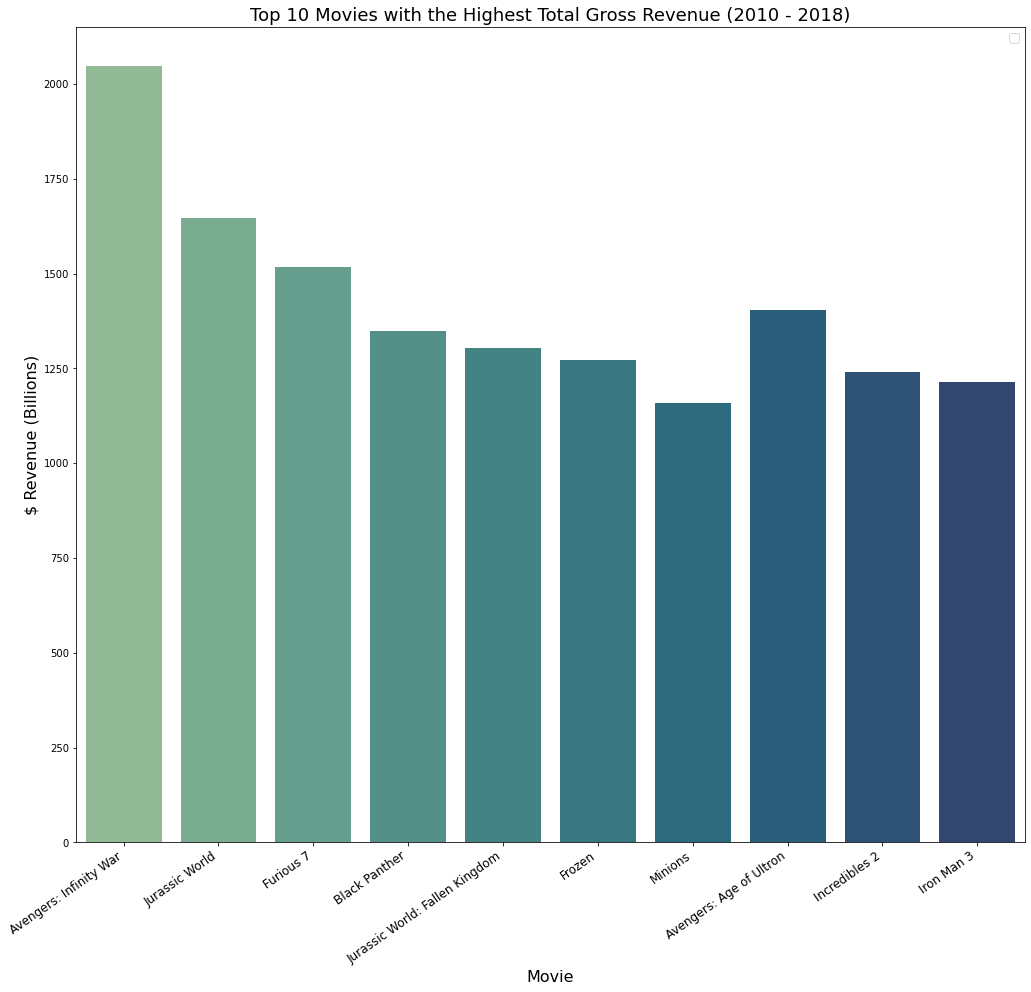

In [40]:
# Top 10 with the highest revenue generated 
plt.figure(figsize=(17,15))
#sns.color_palette("crest", as_cmap=True)
sns.barplot(x=profitable_ranked.loc[0:9, 'Movie'],y=profitable_ranked.loc[0:9, 'Total Gross Revenue'],data=profitable_ranked,palette="crest")
plt.xlabel('Movie', fontsize=16)
plt.title("Top 10 Movies with the Highest Total Gross Revenue (2010 - 2018)", fontsize=18)
plt.ylabel('$ Revenue (Billions)', fontsize=16)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('top10revenue');
plt.show()

In [41]:
group_by_rev= profitable_ranked.groupby(['Movie'], as_index=False)['Total Gross Revenue'].sum().sort_values(by='Total Gross Revenue', ascending=False)
group_by_rev

,Movie,Total Gross Revenue
67,Avengers: Infinity War,2048
332,Jurassic World,1648
225,Furious 7,1518
66,Avengers: Age of Ultron,1403
91,Black Panther,1348
...,...,...
897,Your Sister's Sister,3
449,Obvious Child,3
372,Like Crazy,3
54,Another Earth,2


No handles with labels found to put in legend.


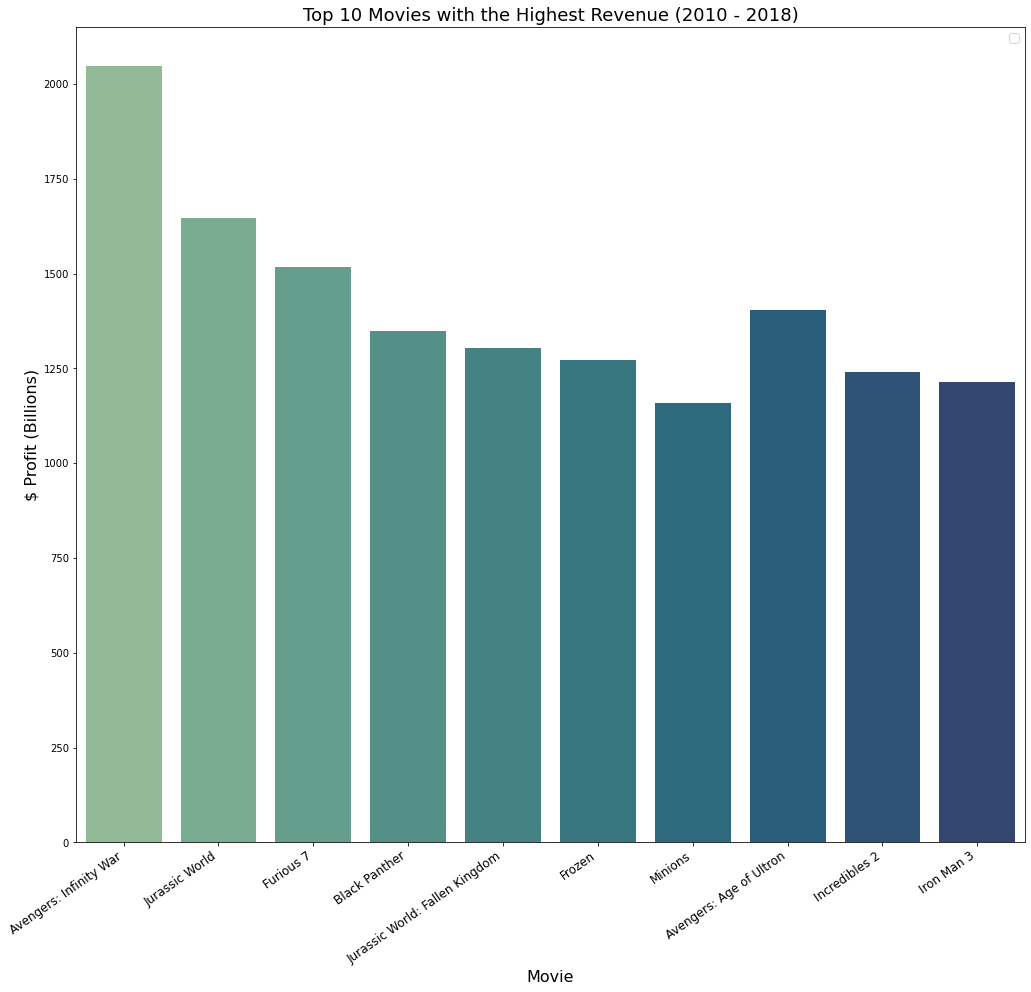

In [42]:
# Top 10 Movies with the highest revenue 
plt.figure(figsize=(17,15))
#sns.color_palette("crest", as_cmap=True)
sns.barplot(x=profitable_ranked.loc[0:9, 'Movie'],y=profitable_ranked.loc[0:9, 'Total Gross Revenue'],data=profitable_ranked,palette="crest")
plt.xlabel('Movie', fontsize=16)
plt.title("Top 10 Movies with the Highest Revenue (2010 - 2018)", fontsize=18)
plt.ylabel('$ Profit (Billions)', fontsize=16)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('top10rev');
plt.show()

In [43]:
group_by_prof= profitable_ranked.groupby(['Movie'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False)
group_by_prof

,Movie,Profit
67,Avengers: Infinity War,1748
332,Jurassic World,1433
225,Furious 7,1328
91,Black Panther,1148
333,Jurassic World: Fallen Kingdom,1135
...,...,...
556,Shut In,1
54,Another Earth,1
221,Friend Request,1
112,Can You Ever Forgive Me?,1


No handles with labels found to put in legend.


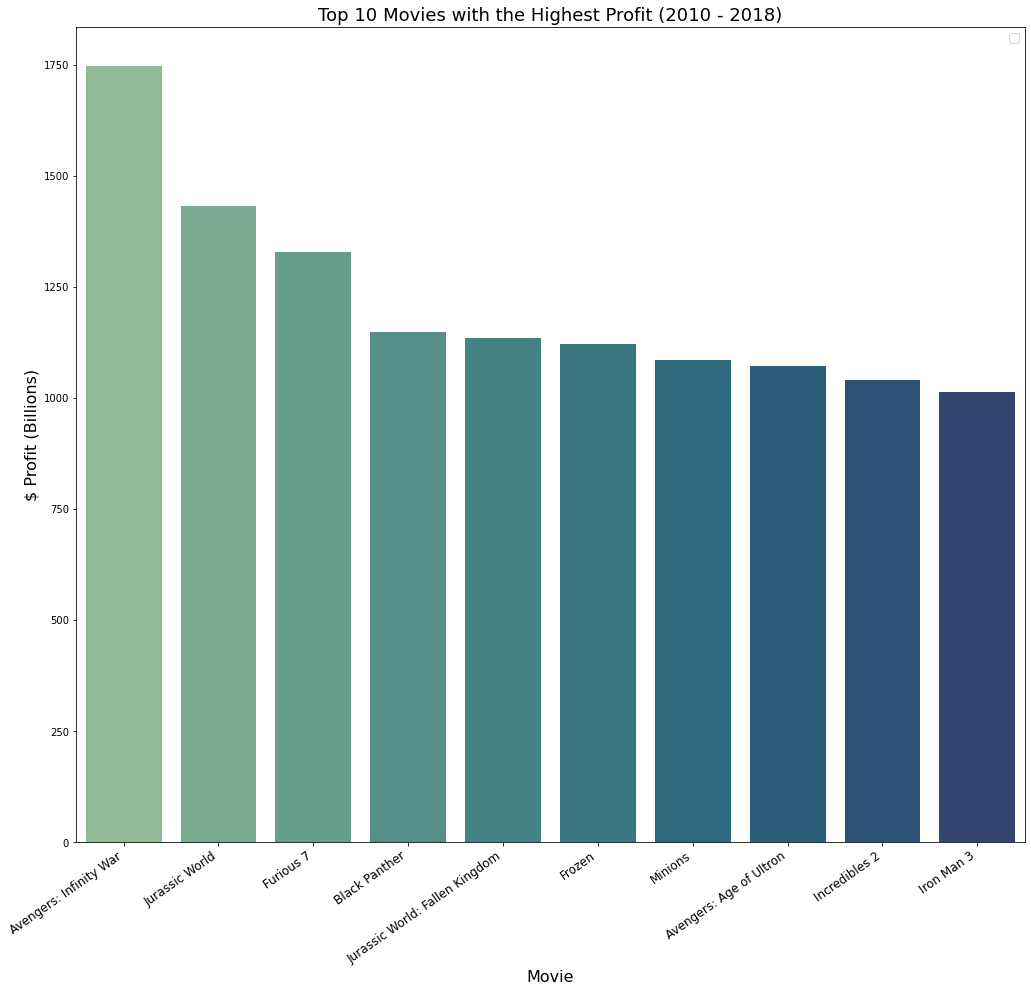

In [44]:
# Top 10 profitable Movies 
plt.figure(figsize=(17,15))
#sns.color_palette("crest", as_cmap=True)
sns.barplot(x=profitable_ranked.loc[0:9, 'Movie'],y=profitable_ranked.loc[0:9, 'Profit'],data=profitable_ranked,palette="crest")
plt.xlabel('Movie', fontsize=16)
plt.title("Top 10 Movies with the Highest Profit (2010 - 2018)", fontsize=18)
plt.ylabel('$ Profit (Billions)', fontsize=16)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('top10prof');
plt.show()

In [46]:
# group studio by total gross revenue and profit and save in a df
b=profitable_ranked.groupby('Studio', as_index=False)[['Total Gross Revenue']].sum().sort_values(by='Total Gross Revenue',  ascending=False)
d=profitable_ranked.groupby('Studio', as_index=False)[['Profit']].sum().sort_values(by='Profit',  ascending=False)

In [47]:
# pick the top 10 studios with the highest total gross revenue and profit
c= b.nlargest(n=10, columns=['Total Gross Revenue'])
c

,Studio,Total Gross Revenue
7,BV,32290
53,Uni.,26380
17,Fox,26188
55,WB,23372
48,Sony,16730
39,Par.,13284
56,WB (NL),8557
24,LGF,6422
36,P/DW,5050
23,LG/S,2919


No handles with labels found to put in legend.


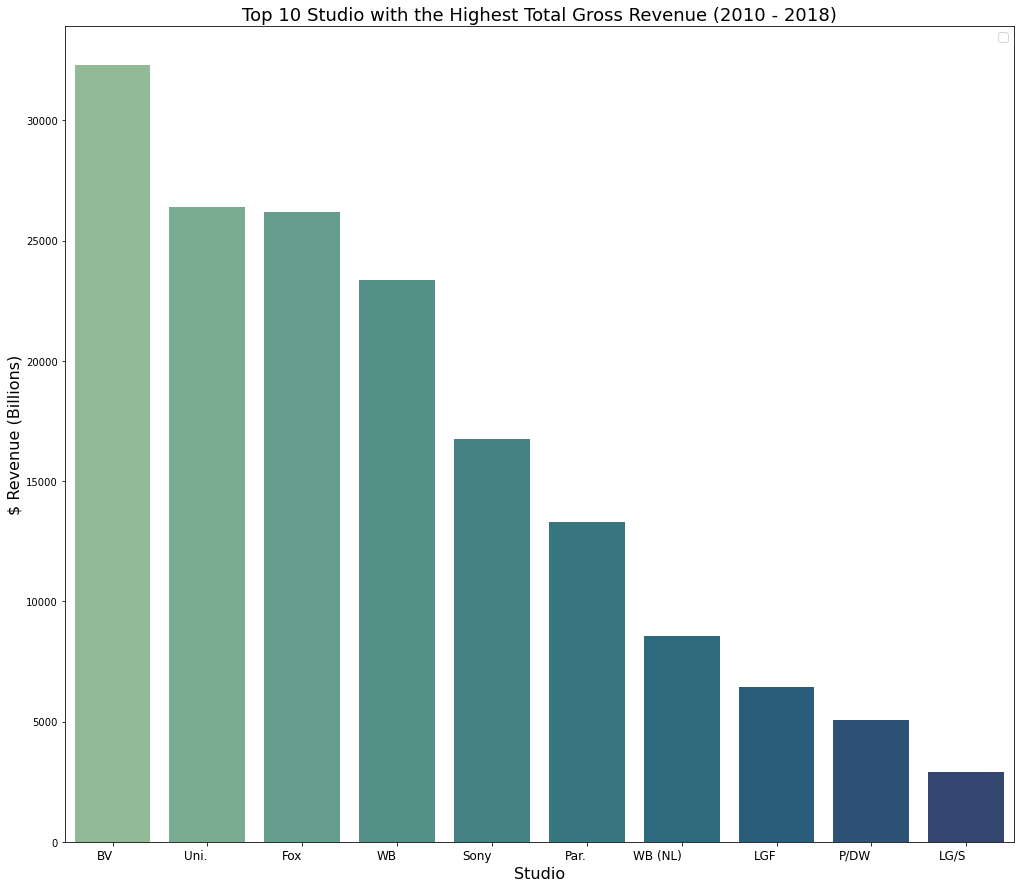

In [48]:
# Plot Studios with the highest Total gross revenue- top 10
plt.figure(figsize=(17,15))
sns.barplot(x='Studio',y='Total Gross Revenue',data=c,palette="crest")
plt.xlabel('Studio', fontsize=16)
plt.title("Top 10 Studio with the Highest Total Gross Revenue (2010 - 2018)", fontsize=18)
plt.ylabel('$ Revenue (Billions)', fontsize=16)
plt.xticks(rotation=0, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('top10revenue_studio');
plt.show()

In [49]:
e=d.nlargest(n=10, columns=['Profit'])
e

,Studio,Profit
7,BV,23482
53,Uni.,20981
17,Fox,18899
55,WB,15389
48,Sony,12100
39,Par.,9239
56,WB (NL),6501
24,LGF,4684
36,P/DW,3756
23,LG/S,1948


No handles with labels found to put in legend.


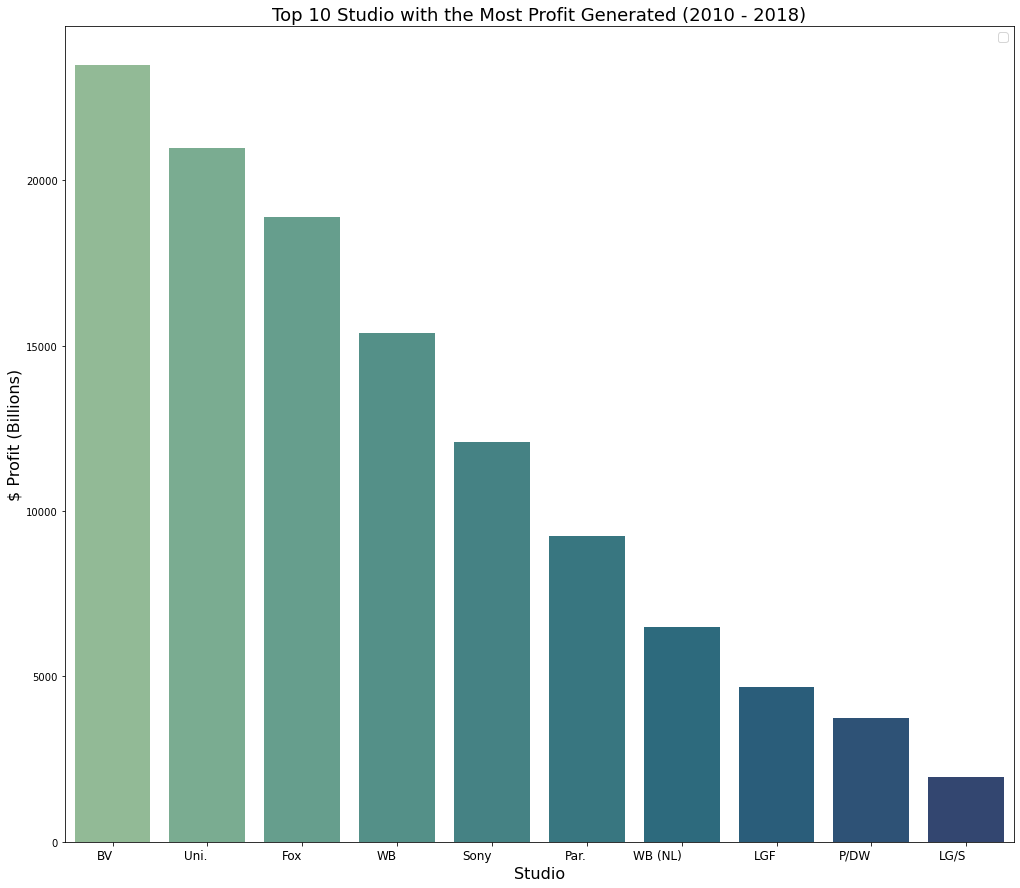

In [50]:
# Plot Studio with the  most profit generated 
plt.figure(figsize=(17,15))
#sns.color_palette("crest", as_cmap=True)
sns.barplot(x='Studio',y='Profit',data=e,palette="crest")
plt.xlabel('Studio', fontsize=16)
plt.title("Top 10 Studio with the Most Profit Generated (2010 - 2018)", fontsize=18)
plt.ylabel('$ Profit (Billions)', fontsize=16)
plt.xticks(rotation=0, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('top10profit_stdio');
plt.show()

In [52]:
# Understand how much these top 10 studios are investing to be earning such huge profits
#On average, the top 10 companies invest about 
f=profitable_ranked.groupby('Studio', as_index=False)[['Costs']].sum().sort_values(by='Costs',  ascending=False)
f=f.nlargest(n=10, columns=['Costs'])
f['Costs'].median()

4337.5

In [53]:
f.describe()

,Costs
count,10.000000
mean,4419.500000
std,2901.373094
min,970.000000
25%,1811.500000
50%,4337.500000
75%,6814.750000
max,8805.000000


# Business Question 1 Recomendations:

# Business Question 2
### What genres of movies should Computing Vision focus on based on total realized profits and profit?

In [57]:
# group grenres by Total  Profit
genres_group_rev=profitable_ranked.groupby('Genres', as_index=False)[['Seasons','Total Gross Revenue',]].sum().sort_values(by='Total Gross Revenue',  ascending=False)
genres_group_rev

,Genres,Total Gross Revenue
0,Action,92156
1,Adventure,38929
4,Comedy,17754
7,Drama,11802
3,Biography,7230
9,Horror,5251
5,Crime,3515
2,Animation,2457
6,Documentary,1065
10,Mystery,711


No handles with labels found to put in legend.


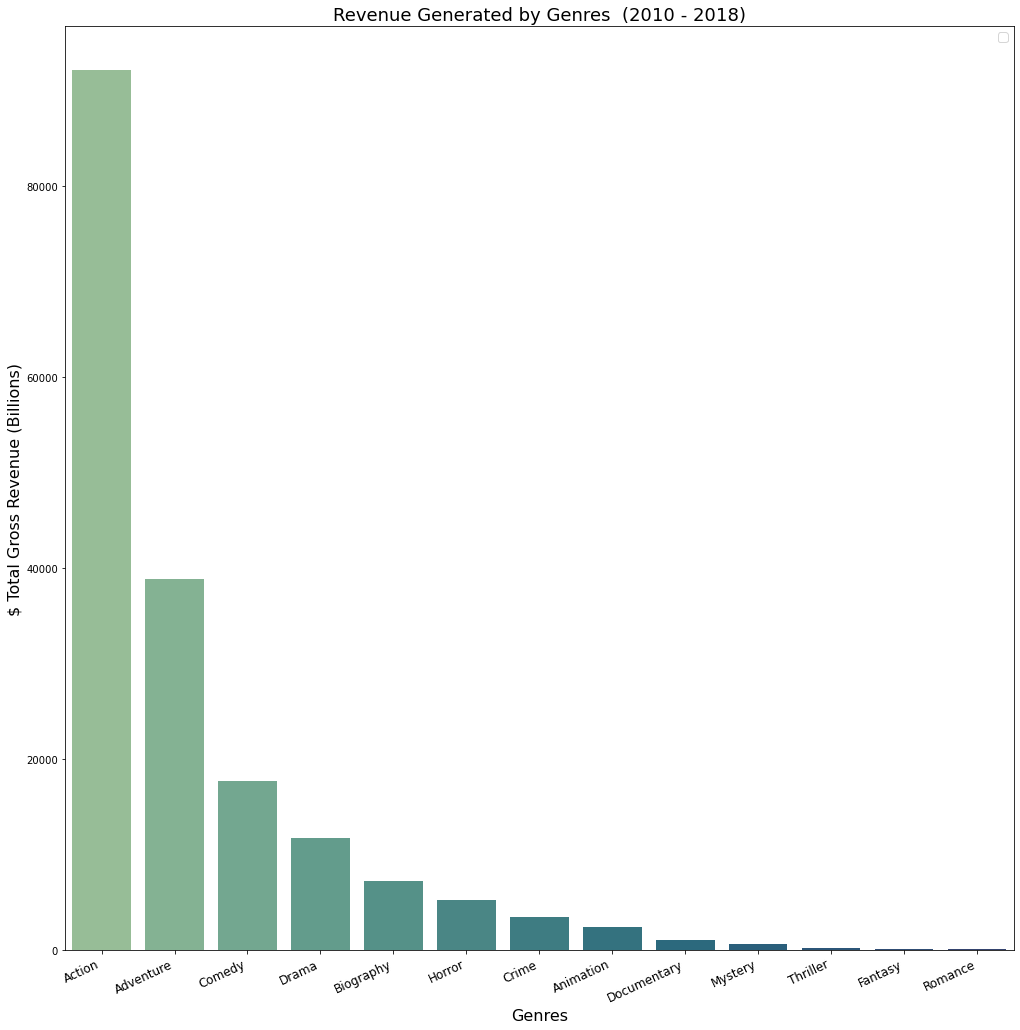

In [58]:
# Plot genres with the  most revenue generated 
plt.figure(figsize=(17,17))
#sns.color_palette("crest", as_cmap=True)
sns.barplot(x='Genres',y='Total Gross Revenue',data=genres_group_prof,palette="crest")
plt.xlabel('Genres', fontsize=16)
plt.title("Revenue Generated by Genres  (2010 - 2018)", fontsize=18)
plt.ylabel('$ Total Gross Revenue (Billions)', fontsize=16)
plt.xticks(rotation=25, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('genres_reve');
plt.show()

In [59]:
# group grenres by Total  Profit
genres_group_prof=profitable_ranked.groupby('Genres', as_index=False)[['Seasons','Profit',]].sum().sort_values(by='Profit',  ascending=False)
genres_group_prof

,Genres,Profit
0,Action,65244
1,Adventure,28335
4,Comedy,12752
7,Drama,8791
3,Biography,5514
9,Horror,4616
5,Crime,2439
2,Animation,1979
6,Documentary,846
10,Mystery,554


No handles with labels found to put in legend.


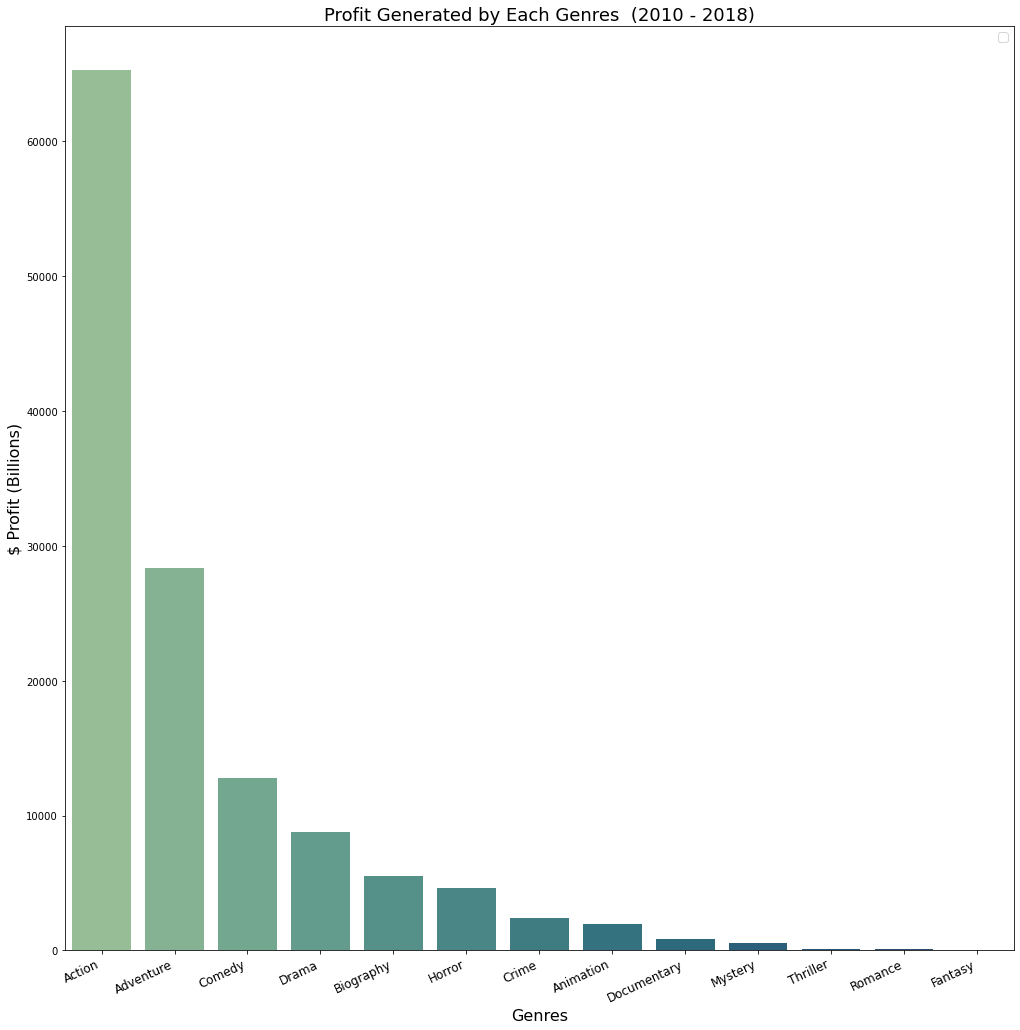

In [60]:
# Plot genres with the  most revenue generated 
plt.figure(figsize=(17,17))
#sns.color_palette("crest", as_cmap=True)
sns.barplot(x='Genres',y='Profit',data=genres_group_prof,palette="crest")
plt.xlabel('Genres', fontsize=16)
plt.title("Profit Generated by Each Genres  (2010 - 2018)", fontsize=18)
plt.ylabel('$ Profit (Billions)', fontsize=16)
plt.xticks(rotation=25, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('genres_prof');
plt.show()


# Business Question 2 Recommendation

# Business Question 3
 ###  What is the best season for Computing Vision to release movies?

In [61]:
#Count of all profitable movies produced in each season from 2010-2018
seasons_count= profitable_ranked.groupby(['Seasons'], as_index=False)[['Movie',]].count().sort_values(by='Movie',  ascending=False)
seasons_count

,Seasons,Movie
0,Fall,248
2,Summer,245
3,Winter,208
1,Spring,202


In [62]:
#Group by seasons ny Total revenue
revenue_by_season= profitable_ranked.groupby(['Seasons'], as_index=False)['Total Gross Revenue'].sum().sort_values(by='Total Gross Revenue', ascending=False)
revenue_by_season

,Seasons,Total Gross Revenue
2,Summer,58626
1,Spring,44292
0,Fall,41360
3,Winter,37083


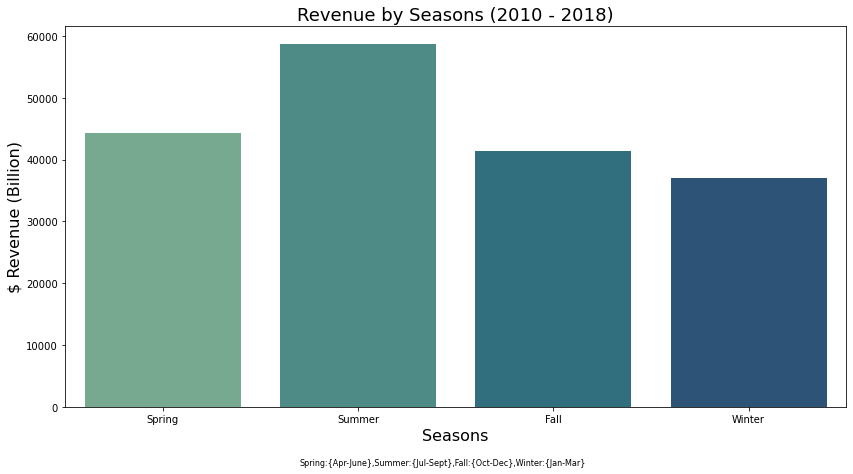

<Figure size 432x288 with 0 Axes>

In [63]:
#Plot seasons by revenue.
plt.figure(figsize=(14,7))
sns.barplot(x=revenue_by_season['Seasons'], y = revenue_by_season['Total Gross Revenue'], palette='crest',
                   order=['Spring','Summer','Fall','Winter'])
plt.xlabel('Seasons', fontsize=16)
plt.ylabel('$ Revenue (Billion)', fontsize=16)
plt.title('Revenue by Seasons (2010 - 2018)', fontsize=18)
plt.figtext(0.5, 0.01, "Spring:{Apr-June},Summer:{Jul-Sept},Fall:{Oct-Dec},Winter:{Jan-Mar}", ha="center", fontsize=8)
plt.show()
plt.savefig('Revenue_seasons');

In [64]:
#Group by seasons by Profit
profit_by_season= profitable_ranked.groupby(['Seasons'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False)
profit_by_season

,Seasons,Profit
2,Summer,43109
1,Spring,31142
0,Fall,29765
3,Winter,27333


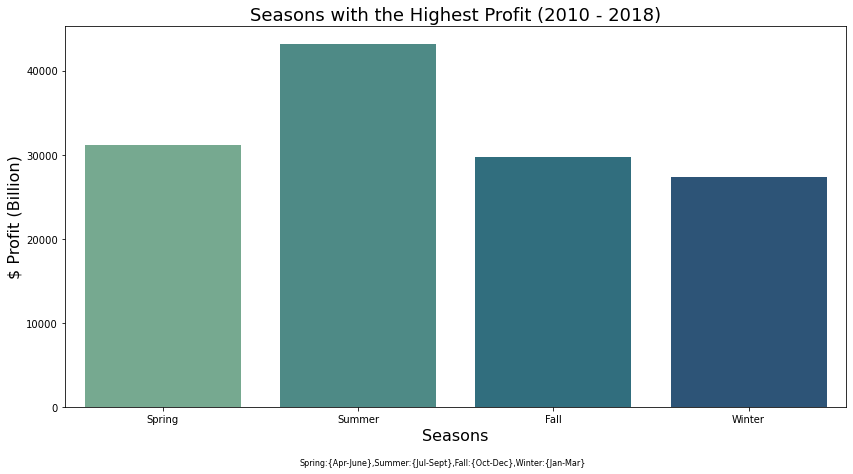

<Figure size 432x288 with 0 Axes>

In [65]:
#Plot seasons by profit.
plt.figure(figsize=(14,7))
sns.barplot(x=profit_by_season['Seasons'], y = profit_by_season['Profit'], palette='crest',
                   order=['Spring','Summer','Fall','Winter'])
plt.xlabel('Seasons', fontsize=16)
plt.ylabel('$ Profit (Billion)', fontsize=16)
plt.title('Seasons with the Highest Profit (2010 - 2018)', fontsize=18)
plt.figtext(0.5, 0.01, "Spring:{Apr-June},Summer:{Jul-Sept},Fall:{Oct-Dec},Winter:{Jan-Mar}", ha="center", fontsize=8)
plt.show()
plt.savefig('Season_movies_by_profit');

In [66]:
# create a dataframe of only summer data and group by profit
seasons_summer=profitable_movies[profitable_movies['Seasons']=='Summer']
seasons_summer_grp= seasons_summer.groupby(['Month'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False)
seasons_summer_grp

,Month,Profit
2,June,19839
1,July,16719
0,August,6551


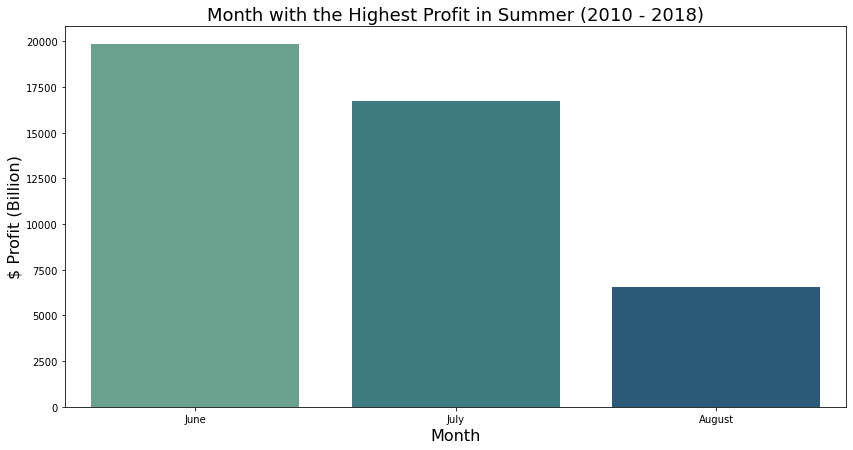

<Figure size 432x288 with 0 Axes>

In [67]:
#Plot seasons by profit.
plt.figure(figsize=(14,7))
sns.barplot(x=seasons_summer_grp['Month'], y = seasons_summer_grp['Profit'], palette='crest')
plt.xlabel('Month', fontsize=16)
plt.ylabel('$ Profit (Billion)', fontsize=16)
plt.title('Month with the Highest Profit in Summer (2010 - 2018)', fontsize=18)
plt.show()
plt.savefig('Month_profit');

In [68]:
# cross tabs between movies genres and seasons
pd.crosstab(profitable_ranked.Seasons, profitable_ranked.Genres,margins=True)

Genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Mystery,Romance,Thriller,All
Seasons,,,,,,,,,,,,,,
Fall,58,35,3,29,39,18,1,47,0,16,0,0,2,248
Spring,67,23,1,9,51,7,5,25,1,11,1,1,0,202
Summer,92,36,1,9,54,7,3,30,1,11,1,0,0,245
Winter,64,23,1,19,44,4,3,35,1,13,1,0,0,208
All,281,117,6,66,188,36,12,137,3,51,3,1,2,903


In [69]:
chisqt = pd.crosstab(profitable_ranked.Genres, profitable_ranked.Seasons, margins=True)
print(chi2_contingency(chisqt)[0:3])
# create contingency table
data_crosstab = pd.crosstab(profitable_ranked['Seasons'],
                            profitable_ranked['Genres'],
                           margins=True, margins_name="Total")

# Significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = profitable_ranked['Seasons'].unique()
columns =  profitable_ranked['Genres'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Finding the p-value and conclusion
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    

(61.63932102339934, 0.16931172914761175, 52)
chisquare-score is: 61.63932102339934  and p value is: 0.004930739065949097
Null Hypothesis is rejected.


# Hypothesis testing on Business Question 3 

### H0: There is no link between type  the type of genres been released  and season.

### H1: There is an association between the type of genres been released  and season.

# Based on the p-value, there is not enough evidence to accept the null hypothesis. This means that there is an assocaition between the season and the the type of movie genres

-NB that: the chi-square can only determine whether two variables are related. It does not necessarily follow that one -variable has a causal relationship with the other. It would require a more detailed analysis to establish causality.

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">